In [13]:
import jieba
import jieba.analyse
jieba.analyse.set_stop_words("f:/data/baidu_stopword.txt")
jieba.analyse.set_idf_path("f:/data/complaint_idf.txt.big");

In [10]:
    
content = open("f:/data/complaint1.txt", 'r', encoding="GBK", errors='ignore').read()

res = jieba.analyse.extract_tags(content, topK=20, withWeight=False, allowPOS=())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.883 seconds.
Prefix dict has been built successfully.


In [14]:
content = open("f:/data/complaint1.txt", 'r', encoding="GBK", errors='ignore').read()

In [16]:
lines = content.split("\n")

In [23]:
datasets = [jieba.analyse.extract_tags(line, topK=20, withWeight=False, allowPOS=()) for line in lines]

In [24]:
from gensim import corpora
from gensim.models import TfidfModel
dct=corpora.Dictionary(datasets)
corpus = [dct.doc2bow(line) for line in datasets]
model = TfidfModel(corpus)

In [32]:
from gensim.matutils import corpus2dense, corpus2csc
from sklearn.cluster import KMeans

corpus_tfidf = model[corpus]
num_docs = dct.num_docs
num_terms = len(dct.keys())


TypeError: data type not understood

In [40]:
# import genism
# from scipy.sparse import csc_matrix

# scipy_csc_matrix =genism.matutils.corpus2csc(corpus)

# full_matrix=csc_matrix(scipy_csc_matrix).toarray()
corpus_tfidf_sparse = corpus2csc(corpus_tfidf)

In [41]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=20, random_state=0).fit_predict(corpus_tfidf_sparse.T)

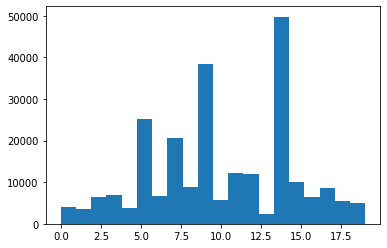

In [46]:
import matplotlib.pyplot as plt
plt.hist(clusters, bins=20)
plt.show()